In [1]:
!pip install music21
!pip install pyblaze
%matplotlib inline

In [2]:
# !kaggle datasets download -d blanderbuss/midi-classic-music
# !mkdir -p dataset
# !unzip -o -qq midi-classic-music.zip -d dataset
# !unzip -o -qq midiclassics.zip -d dataset

In [3]:
# from parse import create_dataset
from parse import convert_offsets_to_waits, get_score_with_components, tokenize_score
from matplotlib import pyplot
import numpy as np

/home/jakub/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import importlib
import parse
importlib.reload(parse)

<module 'parse' from '/home/jakub/neural music/parse.py'>

In [5]:
# create_dataset()

In [6]:
dataset = np.load("dataset_bach.npz")

In [7]:
files = [convert_offsets_to_waits(dataset[file]) for file in dataset.files]

In [8]:
np.savez_compressed("dataset_bach_waits.npz", *files)

In [9]:
dataset_bach_waits = np.load("dataset_bach_waits.npz")

In [10]:
flat = np.concatenate([dataset_bach_waits[file] for file in dataset.files])

In [11]:
flatcmp = get_score_with_components(flat)
np.bincount(flatcmp[flatcmp[:, 1] == 1][:, 0])

array([     0,      0,   4800,  20505,      0,   4531,      0,  16623,
        11215,      0,  13790,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0, 328328,      0,      0,      0,      0,  20428,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
         4573,      0,      0,      0,      0,      0,      0,      0,
            0,      0, 160068,      0,      0,      0,      0,      0,
            0,      0,      0,      0,   3364,      0,      0,      0,
            0,      0,      0,      0,      0,      0,   4835,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,  25723,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [12]:
len(np.unique(flatcmp[flatcmp[:, 1] == 1][:, 0]))

16

(array([7.00000e+00, 1.90000e+01, 4.03000e+02, 2.64400e+03, 7.60600e+03,
        1.82500e+04, 4.64210e+04, 6.77810e+04, 1.46203e+05, 1.25237e+05,
        1.95448e+05, 2.00916e+05, 2.80442e+05, 2.64621e+05, 1.97663e+05,
        5.72870e+04, 1.20820e+04, 1.21400e+03, 4.50000e+02, 2.60000e+01]),
 array([ 12. ,  16.5,  21. ,  25.5,  30. ,  34.5,  39. ,  43.5,  48. ,
         52.5,  57. ,  61.5,  66. ,  70.5,  75. ,  79.5,  84. ,  88.5,
         93. ,  97.5, 102. ]),
 <BarContainer object of 20 artists>)

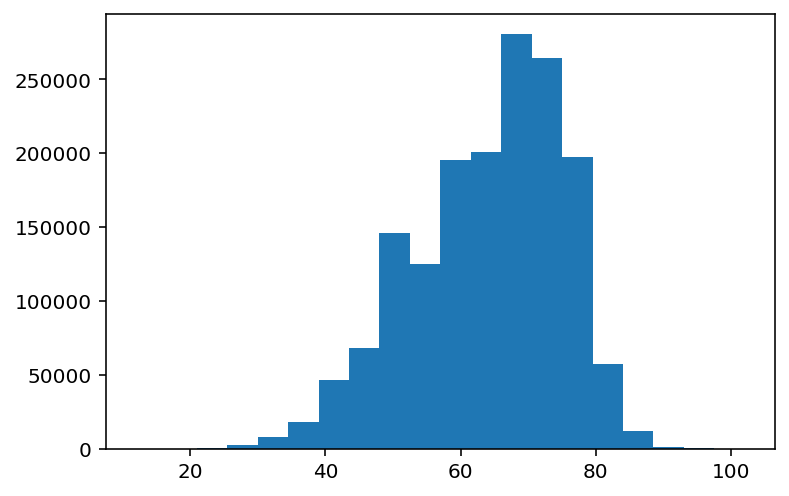

In [13]:
pyplot.hist(flatcmp[flatcmp[:, 1] == 0][:, 0], bins=20)

(array([ 25305.,  21154.,  25005.,      0., 348756., 168005.,  30558.,
           876.,   3651.,    948.]),
 array([1.09861229, 1.61041167, 2.12221105, 2.63401043, 3.14580981,
        3.65760919, 4.16940858, 4.68120796, 5.19300734, 5.70480672,
        6.2166061 ]),
 <BarContainer object of 10 artists>)

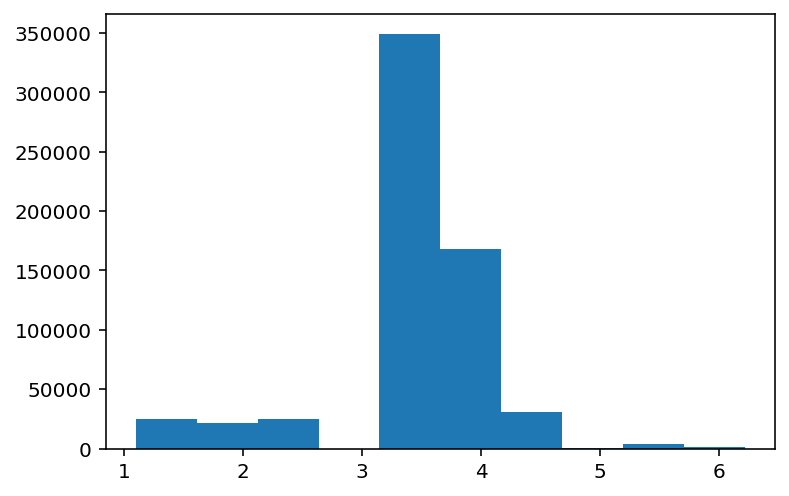

In [14]:
pyplot.hist(np.log1p(flatcmp[flatcmp[:, 1] == 1][:, 0]))

In [15]:
tokens = tokenize_score(flatcmp)

In [16]:
tokens.max()

144.0

In [17]:
files = [tokenize_score(get_score_with_components(dataset_bach_waits[file])) for file in dataset_bach_waits.files]

In [18]:
np.savez_compressed("dataset_bach_tokenized.npz", *files)

In [19]:
files[10]

array([ 0.,  0.,  0., ..., 51., 55.,  0.])

(array([9.48125e+05, 1.00000e+00, 2.50000e+01, 1.37700e+03, 9.27600e+03,
        4.61000e+04, 1.27908e+05, 2.29884e+05, 2.87402e+05, 3.89404e+05,
        4.20478e+05, 1.06575e+05, 5.81400e+03, 4.70000e+02, 6.00000e+00,
        0.00000e+00, 0.00000e+00, 4.80000e+03, 4.15420e+05, 2.04038e+05]),
 array([  0. ,   7.2,  14.4,  21.6,  28.8,  36. ,  43.2,  50.4,  57.6,
         64.8,  72. ,  79.2,  86.4,  93.6, 100.8, 108. , 115.2, 122.4,
        129.6, 136.8, 144. ]),
 <BarContainer object of 20 artists>)

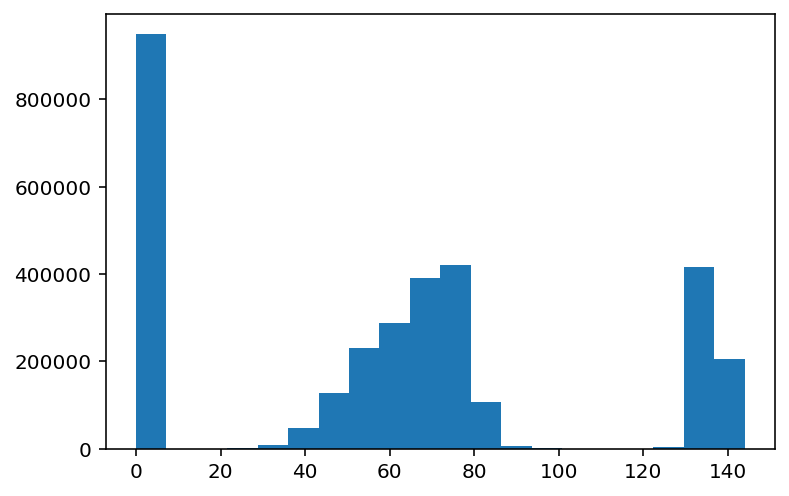

In [20]:
all_files = np.concatenate(files)
pyplot.hist(all_files, bins=20)

In [21]:
import torch
from compressive_transformer_pytorch import CompressiveTransformer
from compressive_transformer_pytorch import AutoregressiveWrapper

In [22]:
class OpressiveTransformer(CompressiveTransformer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.to_logits.add_module("softmax", torch.nn.Softmax(-1))
    # def forward(self, x, memories = None, mask = None):
    #     out, mem, aux_loss = super().forward(x, memories, mask)
    #     return torch.nn.Softmax()(out), mem, aux_loss

In [23]:
model = CompressiveTransformer(
    num_tokens = 128 + 16 + 1,
    dim = 512,
    depth = 6,
    seq_len = 1024,
    mem_len = 1024,
    cmem_len = 256,
    cmem_ratio = 4,
    memory_layers = [5,6],
    mogrify_gru=False,
).cuda()

In [24]:
torch.cuda.memory_allocated()

181756928

In [25]:
# model.generate(torch.ones(1, 1).to(torch.int64).cuda(), 10)

In [26]:
from random import choice
def generate_dataset(path="dataset_bach_tokenized.npz", batch_len=16):
	files = np.load(path)
	while True:
		X = []
		Y = []
		for _ in range(batch_len):
			file = files[choice(files.files)]
			num = np.random.randint(0, len(file) - 1024)
			X.append(file[num: num+1024].tolist())
			Y.append(file[num+1024])
		yield np.array(X), np.array(Y)

In [27]:
gen = generate_dataset(batch_len=2)

In [28]:
x,y = next(gen)
x.shape, y.shape

((2, 1024), (2,))

In [29]:
x

array([[ 0.,  0.,  0., ..., 65., 60., 53.],
       [ 0.,  0.,  0., ..., 68., 61., 61.]])

In [30]:
y

array([141., 141.])

In [31]:
# model_regr = AutoregressiveWrapper(model).cuda()

In [38]:
torch.cuda.empty_cache()

In [34]:
tens = torch.from_numpy(next(gen)[0]).to(torch.int).cuda()

In [35]:
!nvidia-smi

Sun Jul 17 11:45:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.43.04    Driver Version: 515.43.04    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   64C    P0     9W /  N/A |    712MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [43]:
tens = torch.from_numpy(next(gen)[0]).to(torch.int).cuda()
x = model(tens)
# loss, aux_loss, _ = model_regr(torch.from_numpy(np.array([x[0]])).to(torch.int64).cuda(), return_loss=True)

RuntimeError: CUDA out of memory. Tried to allocate 130.00 MiB (GPU 0; 3.82 GiB total capacity; 2.74 GiB already allocated; 24.06 MiB free; 2.92 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [36]:
del x

In [34]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [38]:
model_regr.generate(torch.ones(16, 1024).to(torch.int64).cuda(), 10)

RuntimeError: CUDA out of memory. Tried to allocate 1.00 GiB (GPU 0; 3.82 GiB total capacity; 2.36 GiB already allocated; 582.06 MiB free; 2.38 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
for file in np.load("dataset_bach_tokenized.npz"):
	print(file)
	model_regr.generate(torch.ones(1, 1).to(torch.int64).cuda(), 10)
	print()

In [26]:
for loss, aux_loss, _ in model(inputs.to(torch.int64), return_loss = True):
    print("opt step")
    (loss.sum() + aux_loss.sum()).backward()
    # optimizer step and zero grad

# ... after much training ...

# generation is also greatly simplified and automated away
# just pass in the prime, which can be 1 start token or any length
# all is taken care of for you

prime = torch.ones(1, 1).cuda().to(torch.int64)  # assume 1 is start token
sample = model.generate(prime, 100)

opt step
opt step


In [ ]:
sample